In [25]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
 
%matplotlib inline

In [30]:
#Using the Linked-in data available from https://blog.thedataincubator.com/tag/data-sources/
#File "linkedin_company.csv available for download"

df = pd.read_csv("linkedin_company.csv", na_values=[''])
print(df.shape)
df.head()

(2426196, 14)


,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


In [31]:
# %age of missing values for each column
#print(100*df.isnull().sum()/df.shape[0])
#df.dtypes
#df.describe()

In [32]:
df['as_of_date'] = pd.to_datetime(df['as_of_date'], format='%Y-%m-%d')
df = df.sort_values(by='as_of_date')
df = df.drop(['entity_id', 'cusip', 'isin'], axis=1)
df.shape

(2426196, 11)

In [33]:
df['industry'] = df['industry'].str.strip()
df['company_name'] = df['company_name'].str.strip()
df_grouped_count = df.groupby(['industry', 'company_name'])[['followers_count']].count().reset_index()
print(df_grouped_count.shape)
df_grouped_count.head()

(5526, 3)


,industry,company_name,followers_count
0,Accounting,CBIZ Tofias,93
1,Accounting,Cherokee Inc.,93
2,Accounting,Computerized Waste Systems,94
3,Accounting,GSV Capital Corp (0GV),94
4,Accounting,General Dynamics Shared Resources,93


In [34]:
#Create dataframes for Goldman Sachs, Apple Inc and Exxon Mobil
#Prices fetched from Yahoo, using the pandas_datareader.data library

start = dt.datetime(2015,9,1)
end = dt.datetime(2018,9,30)

df_goldman = df[(df['company_name'] == 'Goldman Sachs')]
df_goldman_price = web.DataReader('GS', 'yahoo', start, end)
df_apple = df[(df['company_name'] == 'Apple')]
df_apple_price = web.DataReader('AAPL', 'yahoo', start, end)
df_xom = df[(df['company_name'] == 'ExxonMobil')]
df_xom_price = web.DataReader('XOM', 'yahoo', start, end)

In [35]:
print(df_goldman.shape)
print(df_goldman_price.shape)
print(df_apple.shape)
print(df_apple_price.shape)
print(df_xom.shape)
print(df_xom_price.shape)

(1022, 11)
(777, 6)
(1025, 11)
(777, 6)
(1012, 11)
(777, 6)


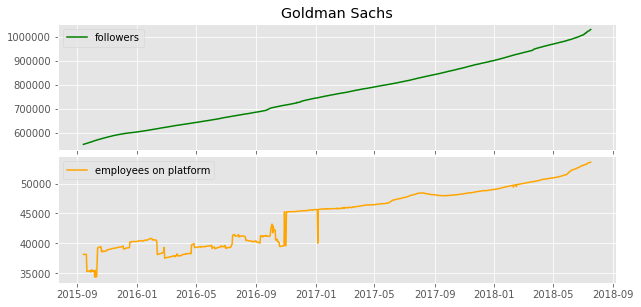

In [36]:
# Plots for Goldman Sachs

style.use('ggplot')
figsize=(10, 8)
fig = plt.figure(figsize = figsize)
plt.subplots_adjust(hspace=0.05)

ax1 = plt.subplot(311)
ax1.plot(df_goldman['as_of_date'], df_goldman['followers_count'], color='g', label='followers')
plt.legend()
plt.title('Goldman Sachs')
ax2 = plt.subplot(312, sharex=ax1)
ax2.plot(df_goldman['as_of_date'], df_goldman['employees_on_platform'], color='orange', label='employees on platform')
plt.legend()

fig.autofmt_xdate()
xticklabels = ax2.get_xticklabels()
plt.setp(xticklabels, visible=True)
plt.show()

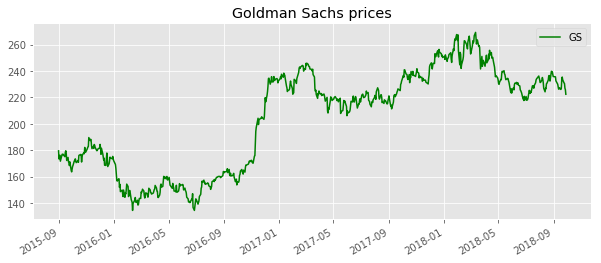

In [37]:
figsize=(10, 4)
fig = plt.figure(figsize = figsize)
plt.plot(df_goldman_price.index, df_goldman_price['Adj Close'], color='g', label='GS')
plt.legend()
plt.title('Goldman Sachs prices')
fig.autofmt_xdate()
plt.show()

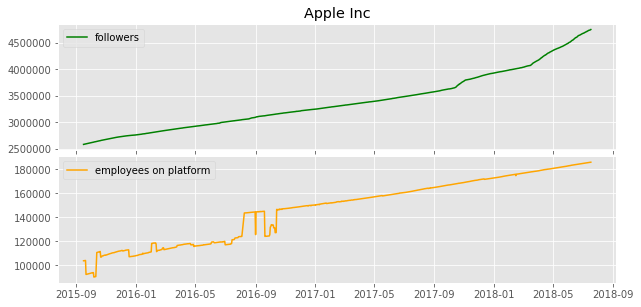

In [38]:
# Plots for Apple Inc.

style.use('ggplot')
figsize=(10, 8)
fig = plt.figure(figsize = figsize)
plt.subplots_adjust(hspace=0.05)

ax1 = plt.subplot(311)
ax1.plot(df_apple['as_of_date'], df_apple['followers_count'], color='g', label='followers')
plt.legend()
plt.title('Apple Inc')
ax2 = plt.subplot(312, sharex=ax1)
ax2.plot(df_apple['as_of_date'], df_apple['employees_on_platform'], color='orange', label='employees on platform')
plt.legend()

fig.autofmt_xdate()
xticklabels = ax2.get_xticklabels()
plt.setp(xticklabels, visible=True)
plt.show()

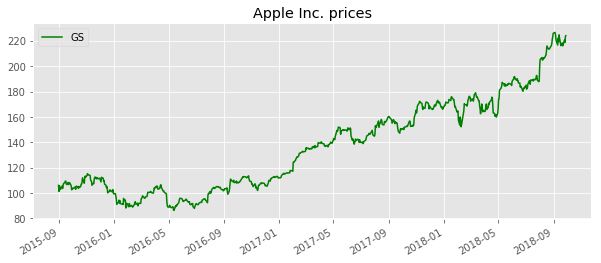

In [39]:
figsize=(10, 4)
fig = plt.figure(figsize = figsize)
plt.plot(df_apple_price.index, df_apple_price['Adj Close'], color='g', label='GS')
plt.legend()
plt.title('Apple Inc. prices')
fig.autofmt_xdate()
plt.show()

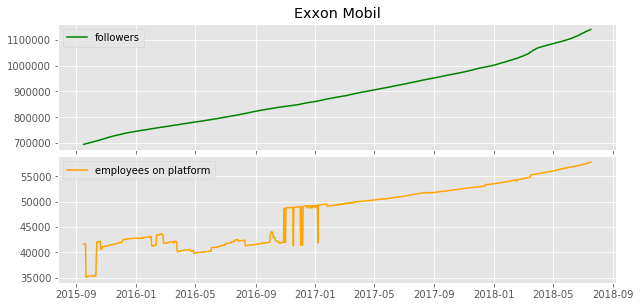

In [40]:
# Plots for Exxon Mobil

style.use('ggplot')
figsize=(10, 8)
fig = plt.figure(figsize = figsize)
plt.subplots_adjust(hspace=0.05)

ax1 = plt.subplot(311)
ax1.plot(df_xom['as_of_date'], df_xom['followers_count'], color='g', label='followers')
plt.legend()
plt.title('Exxon Mobil')
ax2 = plt.subplot(312, sharex=ax1)
ax2.plot(df_xom['as_of_date'], df_xom['employees_on_platform'], color='orange', label='employees on platform')
plt.legend()

fig.autofmt_xdate()
xticklabels = ax2.get_xticklabels()
plt.setp(xticklabels, visible=True)
plt.show()

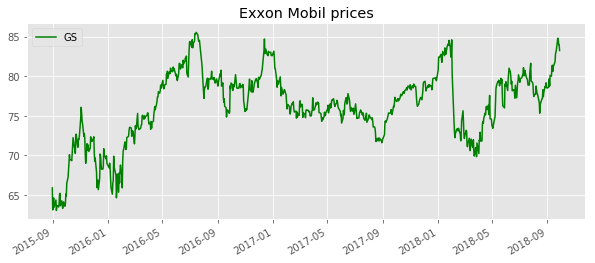

In [41]:
figsize=(10, 4)
fig = plt.figure(figsize = figsize)
plt.plot(df_xom_price.index, df_xom_price['Adj Close'], color='g', label='GS')
plt.legend()
plt.title('Exxon Mobil prices')
fig.autofmt_xdate()
plt.show()